In [1]:
import warnings
warnings.simplefilter('ignore')

%matplotlib inline
import seaborn as sns
import matplotlib.pyplot as plt

%config InlineBackend.figure_format = 'svg' 


from pylab import rcParams
rcParams['figure.figsize'] = 8, 5

In [2]:

import numpy as np 
import pandas as pd 
Wine = pd.read_csv('/kaggle/input/red-wine-quality-cortez-et-al-2009/winequality-red.csv')


In [3]:
Wine.sort_values(by='quality')

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
1478,7.1,0.875,0.05,5.7,0.082,3.0,14.0,0.99808,3.40,0.52,10.2,3
832,10.4,0.440,0.42,1.5,0.145,34.0,48.0,0.99832,3.38,0.86,9.9,3
899,8.3,1.020,0.02,3.4,0.084,6.0,11.0,0.99892,3.48,0.49,11.0,3
1374,6.8,0.815,0.00,1.2,0.267,16.0,29.0,0.99471,3.32,0.51,9.8,3
459,11.6,0.580,0.66,2.2,0.074,10.0,47.0,1.00080,3.25,0.57,9.0,3
...,...,...,...,...,...,...,...,...,...,...,...,...
495,10.7,0.350,0.53,2.6,0.070,5.0,16.0,0.99720,3.15,0.65,11.0,8
1403,7.2,0.330,0.33,1.7,0.061,3.0,13.0,0.99600,3.23,1.10,10.0,8
1090,10.0,0.260,0.54,1.9,0.083,42.0,74.0,0.99451,2.98,0.63,11.8,8
1449,7.2,0.380,0.31,2.0,0.056,15.0,29.0,0.99472,3.23,0.76,11.3,8


DS,sorted by quality.

In [4]:
Wine['quality'].mean() #for convenience


5.6360225140712945

Average estimation of Wine.

In [5]:
Wine[Wine['quality'] >= (Wine['quality'].mean()*1.2)]

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
7,7.3,0.65,0.00,1.2,0.065,15.0,21.0,0.99460,3.39,0.47,10.00,7
8,7.8,0.58,0.02,2.0,0.073,9.0,18.0,0.99680,3.36,0.57,9.50,7
16,8.5,0.28,0.56,1.8,0.092,35.0,103.0,0.99690,3.30,0.75,10.50,7
37,8.1,0.38,0.28,2.1,0.066,13.0,30.0,0.99680,3.23,0.73,9.70,7
62,7.5,0.52,0.16,1.9,0.085,12.0,35.0,0.99680,3.38,0.62,9.50,7
...,...,...,...,...,...,...,...,...,...,...,...,...
1541,7.4,0.25,0.29,2.2,0.054,19.0,49.0,0.99666,3.40,0.76,10.90,7
1544,8.4,0.37,0.43,2.3,0.063,12.0,19.0,0.99550,3.17,0.81,11.20,7
1549,7.4,0.36,0.30,1.8,0.074,17.0,24.0,0.99419,3.24,0.70,11.40,8
1555,7.0,0.56,0.17,1.7,0.065,15.0,24.0,0.99514,3.44,0.68,10.55,7


In [6]:
print(Wine[Wine['quality'] >= Wine['quality'].mean()]['alcohol'].mean())
print(Wine[Wine['quality'] >= Wine['quality'].mean()]['alcohol'].min())
print(Wine[Wine['quality'] >= Wine['quality'].mean()]['alcohol'].max()) #alcohol values - maximum minimum and average, in the future for graphs

10.855029239766068
8.4
14.0


The average ,maximum and minimum alcohol content of a wine with a high estimation


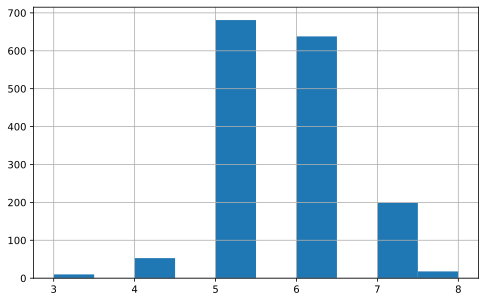

In [7]:
Graph=Wine['quality'].hist()
Graph=Graph.get_figure() #to show only one graph. Пraph showing the ratio of wine with different ratings, most-with a rating above average

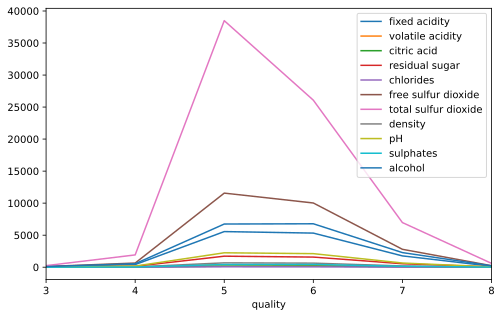

In [8]:

Wine.groupby('quality').sum().plot()

Here are 2 simple graphs ,the first one is described above ,and the second one, i.e. this one shows the dependence of the score on the composition. I don't think that will need any more similar graphs in this dataset to show dependencies

but the level of 'total sulfur dioxide' content increased significantly and then decreased with increasing grades. Let's try to determine at what alcohol content the wine CAN get the highest score

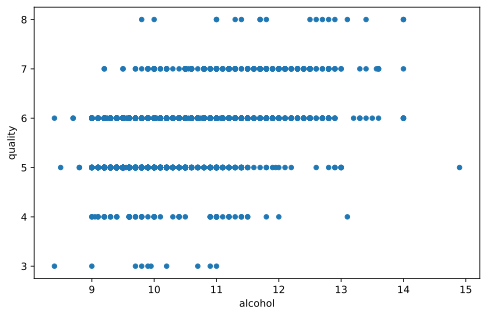

In [9]:
Wine.plot.scatter(x = 'alcohol',y='quality')

Thus, we see that the best quality wine can be if it has an alcohol content of 12-14.But this is not a pattern, just a statistic


From the graph of changes in the content of substances, it can be concluded that the growth 'total sulfure dioxide' and 'free sulfur dioxide' will lead to a decrease in the wine quality rating from 5 to 7.

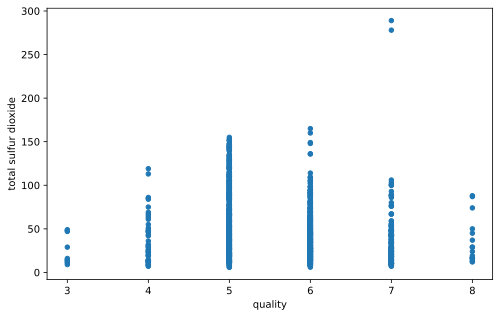

In [10]:
Wine.plot.scatter(x = 'quality',y='total sulfur dioxide')

So, with the increase, you can see that the quality of the wine is close to 5 and 6

This data was still not enough for anything.
Let's make up the dependence of the quality of wine on the presence of each of the drugs in it and consider its influence.

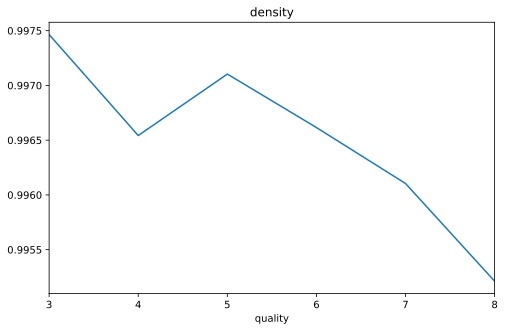

In [11]:
plt.subplot(1,1,1)
Wine.groupby('quality')['density'].mean().plot(kind="line",title="density")

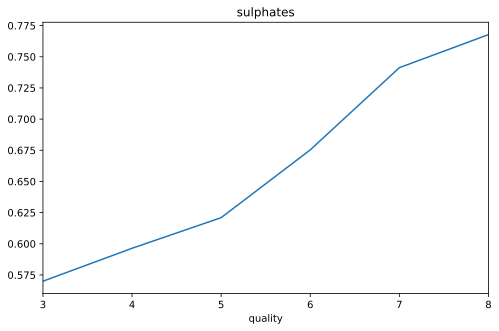

In [12]:
plt.subplot(1,1,1)
Wine.groupby('quality')['sulphates'].mean().plot(kind="line",title="sulphates")

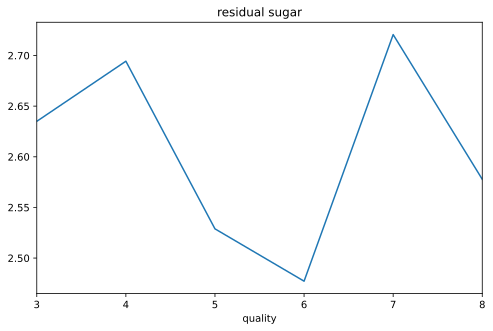

In [13]:
plt.subplot(1,1,1)
Wine.groupby('quality')['residual sugar'].mean().plot(kind="line",title="residual sugar")

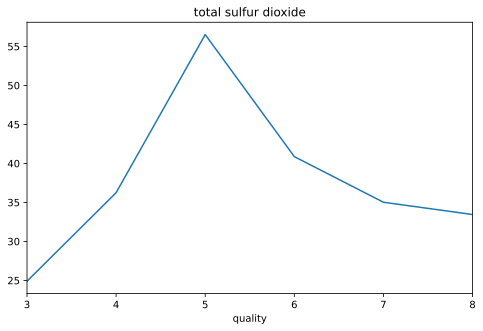

In [14]:
plt.subplot(1,1,1)
Wine.groupby('quality')['total sulfur dioxide'].mean().plot(kind="line",title="total sulfur dioxide")

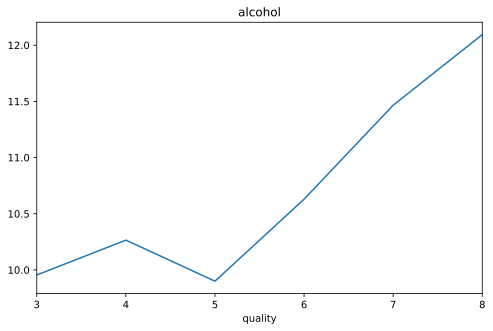

In [15]:
plt.subplot(1,1,1)
Wine.groupby('quality')['alcohol'].mean().plot(kind="line",title="alcohol")

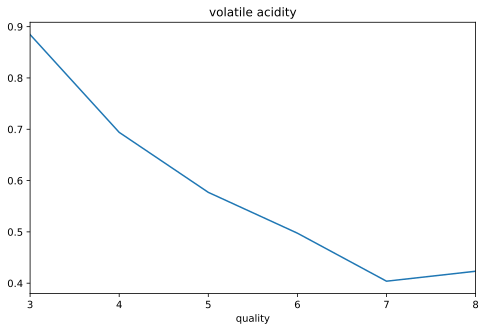

In [16]:
plt.subplot(1,1,1)
Wine.groupby('quality')['volatile acidity'].mean().plot(kind="line",title="volatile acidity")

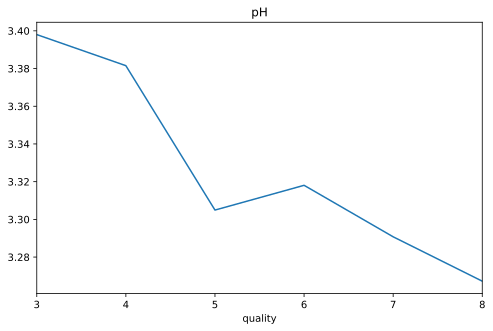

In [17]:
plt.subplot(1,1,1)
Wine.groupby('quality')['pH'].mean().plot(kind="line",title="pH")


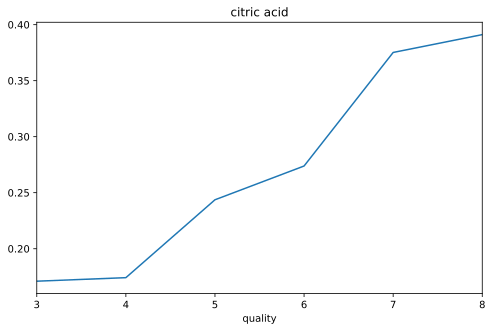

In [18]:
plt.subplot(1,1,1)
Wine.groupby('quality')['citric acid'].mean().plot(kind="line",title="citric acid")

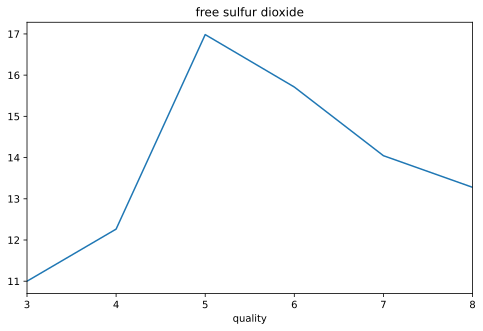

In [19]:
plt.subplot(1,1,1)
Wine.groupby('quality')['free sulfur dioxide'].mean().plot(kind="line",title="free sulfur dioxide")

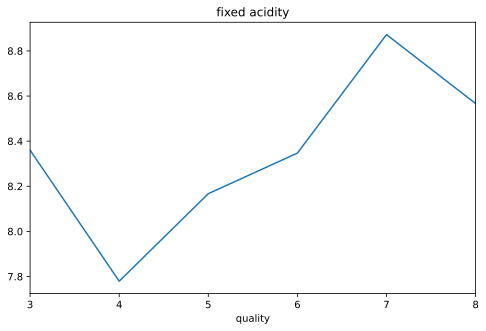

In [20]:
plt.subplot(1,1,1)
Wine.groupby('quality')['fixed acidity'].mean().plot(kind="line",title="fixed acidity")


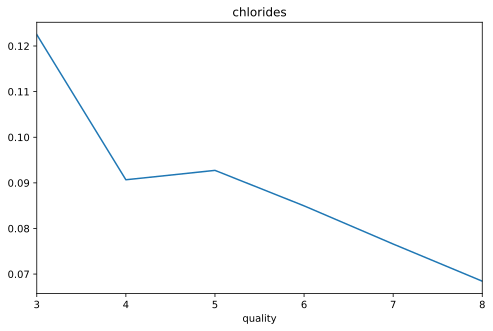

In [21]:
plt.subplot(1,1,1)
Wine.groupby('quality')['chlorides'].mean().plot(kind="line",title="chlorides")

Several conclusions and hypotheses can be drawn from all the graphs:
1. chlorides,free sulfur dioxide,pH,total sulfur dioxide and dencity with their **decrease** proportionally increases the quality of wine.
2. critic acid, alcohol and sulfutes with their **increase** proportionally increases the quality of wine. 
* The regularity of the influence of other qualities needs to be calculated by a more labor-intensive process. Let's try to make do with what we have.

# Feature engineering

The quality of pine grows almost perfectly evenly with a proportional decrease in the chloride content, the Effect of other parameters will be difficult to calculate using the function. I will try to simplify and calculate the function for finding the regularity of the dependence of quality on chloride.

The quality of pine grows almost perfectly evenly with a proportional decrease in the chloride content, the Effect of other parameters will be difficult to calculate using the function. I will try to simplify and calculate the function for finding the regularity of the dependence of quality on chloride.

The chloride graph for 5-8 has the function :** y=0.05x-0,177**

I think in the future, this coefficient (function) would be reasonable to use in the future instead of combining several existing parameters. To be honest, I don't know how you can deduce any new signs here.
